Machine Learning is the field of teaching machines and computers to learn from existing data to make predictions on new data.

# Part I :  Classification : 

you will be introduced to classification problems and learn how to solve them using supervised learning techniques. Classification problems are prevalent in a variety of domains, ranging from finance to healthcare. Here, you will have the chance to apply what you are learning to a political dataset, where you classify the party affiliation of United States Congressmen based on their voting records.

Scikit-lear(Skl) integrates well with SciPy Stack
other libraries : Tenserflow and Keras

## 1- Exploratory Data Analysis 

In [2]:
from sklearn import datasets
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')

iris = datasets.load_iris()
print(type(iris))
print(iris.keys())
print(type(iris.data), type(iris.target))
print(iris.data.shape)
print(iris.target_names)

X= iris.data
Y= iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(150, 4)
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 2- Visual EDA : 

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


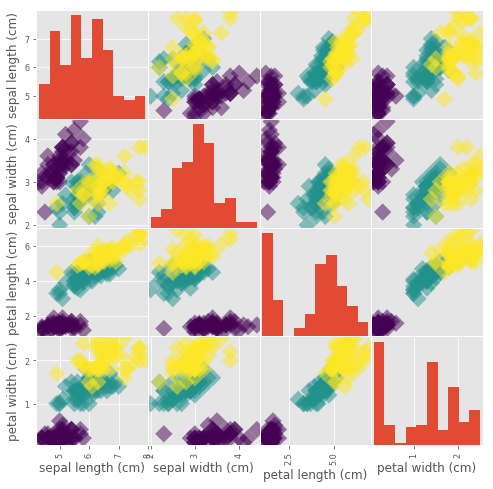

In [12]:
_= pd.scatter_matrix(df, c= Y, figsize= [8,8], s=150, marker= 'D')
plt.show()

## 3- The classification challenge algorithm 1 : k-nearest neighbors (KNN)

predict the label of any data point by looking at K(closed data point) and taking a majority vote

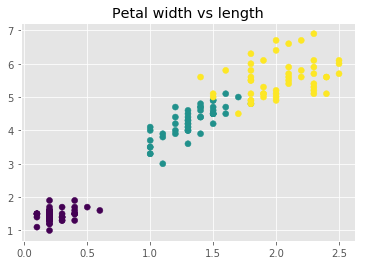

(150, 4)


In [40]:
_= plt.scatter(x=df['petal width (cm)'], y=df['petal length (cm)'], c= Y)
_= plt.title('Petal width vs length')     
plt.show()


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'],iris['target'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [59]:
new = {'sepal length (cm)': [5.1, 3.9, 5.2, 3.9], 'sepal width (cm)': [3.5, 4.2, 3.2, 4.2],'petal length (cm)': [1.4, 1.5, 1.4, 1.5], 'petal width (cm)':[0.2, 0.2, 0.2, 0.2]}
X_new = pd.DataFrame(new)
X_new

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,3.9,4.2,1.5,0.2
2,5.2,3.2,1.4,0.2
3,3.9,4.2,1.5,0.2


In [60]:
prediction = knn.predict(X_new)
print('Prediction{}'.format(prediction))

Prediction[0 0 0 0]


## 4- Measuring model performance : 

accuracy is a commonly used metric 
Accuracy = Number of correct prediction/ total number of data points

we split data into 2 sets: training set and test set(on which we measure the classifier) 


In [68]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.3, random_state = 21, stratify = iris['target'])

knn2= KNeighborsClassifier(n_neighbors=8)
knn2.fit(X_train, y_train)
y_predict= knn2.predict(X_test)
print('Test predictions:\n {}'.format(y_predict))



Test predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [69]:
## measuring accuracy : 

score_knn2 = knn2.score(X_test, y_test) 
score_knn2

0.9555555555555556

## 5- Model complexity : The problem of overfitting/Underfitting the algorithm 

** Larger K (increasing the number of K n_neighbors )> Less complex model > smooth desicion boundry (increasing K too much can lead to underfitting).

** Small K > more complex model > can lead to overfitting (too perfect : works perfect only on trained data but doesn't work on test and new data).

##### Overfitting and underfitting

Remember the model complexity curve ? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.



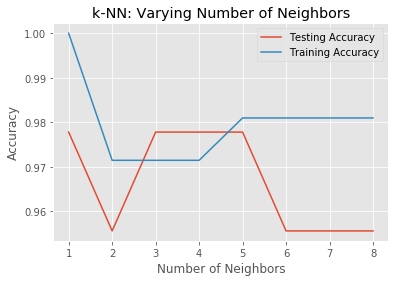

it looks like the test accuracy is highest when using 3 and 5 neighbors.Using 6 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!


In [80]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
print("it looks like the test accuracy is highest when using 3 and 5 neighbors.Using 6 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification, you will learn about regression in the next chapter!")

### 6- How good is your model? : Evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report.

accuracy is not always an informative metric in binary classification problems with a frequent class

in classification problem, when a class is more frequent this phenomena is called **class imbalance**. Ex : real email 99% vs spam 1%. This is a very commen situation in practice and requires a more nuanced metric to assess the performance of the model that is **Confusion matrix** :  Given a binary classificaion task, we built up a 2by2 matrix that summerizes predictive performance. 


We can derive the **accuracy of the model** from the confusion matrix : sum of the diagonal (true positive)/ total matrix. 

another matric we can calculate from the confusion matrix is the **precision : positive predicted value (PPV)** : true positve/ (truep+falsep)  

* high precision means that the classifier had a low false positive, that didn't put element of the frequent class a in the other class b 


**Recall/Sensitivity/hit rate/ true positive rate** : true positive/(true positive + false negative).

* high recall means that the classifier predected correctly the class a and b 

**F1 score** : it's the harmonic mean of the precision and recall that equals 2* (precision * recall)/ (precision+relcall)

Precision=TP/TP+FP
Recall=TP/TP+FN


In [84]:
## Confusiom matrix : 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#import classifier
knn2= KNeighborsClassifier(n_neighbors=8)
#split the data 
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.3, random_state = 21, stratify = iris['target'])
#fit the classifier KNN
knn2.fit(X_train, y_train)
# predict 
y_predict= knn2.predict(X_test)

# Print Confusion matrix 
print(confusion_matrix(y_test, y_predict))

# Print classification Reports : 
print(classification_report(y_test, y_predict))

print("The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of setosa, verginica, versicolor in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.")


[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.93      0.93      0.93        15
          2       0.93      0.93      0.93        15

avg / total       0.96      0.96      0.96        45

The support gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of setosa, verginica, versicolor in the test set on which the classification report was computed. The precision, recall, and f1-score columns, then, gave the respective metrics for that particular class.


In [105]:
#Hyperparameter tuning with GridSearchCV: 

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,50)}

knnx = KNeighborsClassifier()
knnx_cv = GridSearchCV(knnx, param_grid, cv=5) 
knnx_cv.fit(iris['data'],iris['target'])
print(knnx_cv.best_params_)
print(knnx_cv.best_score_)

{'n_neighbors': 6}
0.98


## 7 - The classification challenge algorithm 2 : logistic Regression 

**logistic regression for binary classification 0 and 1 :** 

logistic regression (log reg) outputs probabilities : 

if p> 0.5 the class/ data is considered to be 1 
if p< 0.5 the class/ data is considered to be 0

log reg produces a linear regression boundary that separates the data. 

**The probability thresholds** is by defaut 0.5 but we can vary it. (if so, what happens to the true positive and false positive rates as we vary the thresholds) : 

when threshold p = 0, the model predicts 1 for all the data(true positive rate = false positive rate= 1)
when threshold p = 1, the model predicts 0 for all the data(true positive rate = false positive rate= 0)

if we vary the treshold btw p= 1 and p=2 we get a serie of true positive and false positive . 
the set of points we get when trying all of the possible threshold btw 0 and 1 is callde **the receiving operating characteristic curve ROC curve** 


ROC curves provide a way to visually evaluate models. Most classifiers in scikit-learn have a .predict_proba() method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the .predict_proba() method and become familiar with its functionality.

##### plotting the ROC curve(works in binary targets not in multiclass targets : 

from sklearn.metrics import roc_curve 

y_pred_prob = logreg.predict_proba(X_test)[:,1]

#unpacking : 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plotting

_= plt.plot([0,1],[0,1], 'k--')
_= plt.plot(fpr, tpr, label='Logistic Regression')
_= plt.xlabel('False positive rate')
_= plt.ylabel('True positive rate')
_= plt.title('Logistic Regression ROC curve')
plt.show()


#### Area under the roc curve AUC : 

the bigger the area the better the model, so AUC is another popular metric for classification models. 

we can compete AUC using cross validation 

from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(logreg, X,y, scoring='roc_auc')

In [87]:
# Necessary Imports 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [104]:
# Definig the model 
logreg = LogisticRegression()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.4, random_state = 42)

# training the model : 
logreg.fit(X_train, y_train)

#predicting on test
y_pred = logreg.predict(X_test)

#Measuring performance of the model: 
print(logreg.score(X_test, y_pred)) # not sure, the other scores take y_test, y_pred.

#Measuring performance of the model: 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[23  0  0]
 [ 0 17  2]
 [ 0  0 18]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        23
          1       1.00      0.89      0.94        19
          2       0.90      1.00      0.95        18

avg / total       0.97      0.97      0.97        60



#### Precision-recall Curve :

One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

Precision=TP/ (TP+FP)
Recall=TP/ (TP+FN)


In [112]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-1, 10, 10)
p_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg_ = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg_, p_grid, cv=5)

# Fit it to the data
logreg_cv.fit(iris['data'],iris['target'])

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 27.825594022071257}
Best score is 0.9733333333333334


## 8 - The classification challenge algorithm 2 : Decision Tree 

## hyperparameter tuning 

see diabetes data. 

# Part 2 :  Regression 

linear regression model using sklearn. 

ex of regression problem to solve : A bike share company using time and weather data to predict the number of bikes being rented at any given hour. 

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


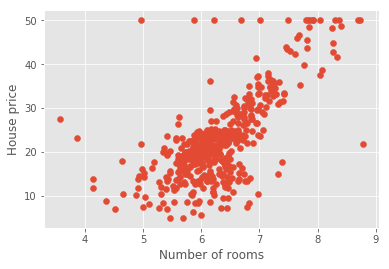

In [33]:
boston = datasets.load_boston()
print(boston.keys())

# how to load data features from bunch into df pandas
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
#print(bos.head())

# creating features and target variables from bunch: 
# f = boston.data
# t = boston.target


# # predecting the price from a single feature and correcting to desired shape:
X_rooms = bos.iloc[:,5].values
X_rooms_correct = X_rooms.reshape(-1,1)
y_target = boston.target.reshape(-1,1)

# plotting housing values(y_target) vs number of rooms :

_ = plt.scatter(X_rooms_correct,y_target)
_ = plt.xlabel('Number of rooms')
_ = plt.ylabel('House price')
plt.show()

## Fitting a regression model using sklearn linear_model: 


In [35]:
from sklearn import linear_model 


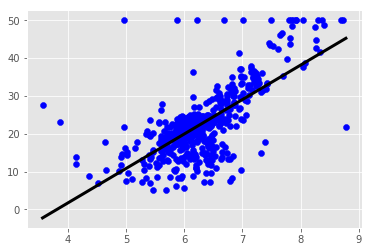

In [37]:
# fiting a regression model to the data :
reg = linear_model.LinearRegression()
reg.fit(X_rooms_correct, y_target)

# Check out the regressor predictions over the rang of data : 

#regressor btw data points begins from min(X_rooms_correct) to max(X_rooms_correct)
prediction_space = np.linspace(min(X_rooms_correct), max(X_rooms_correct)).reshape(-1,1)

_= plt.scatter(X_rooms_correct, y_target, color = 'blue')

#making prediction for prediction_space using reg.predict : 
_= plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth= 3)
plt.show()

## split_fit_predict_score without regularisation :

In [40]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets :
X_rooms_correct_train,X_rooms_correct_test, y_target_train,y_target_test = train_test_split(X_rooms_correct, y_target, test_size = 0.3, random_state = 42)

#import linear_regression and fit it to the training set
reg_all = linear_model.LinearRegression()
reg_all.fit(X_rooms_correct_train, y_target_train)
y_prediction = reg_all.predict(X_rooms_correct_test)

#The accuracy metric in linear regression R squared 
# This matric quantifies the amount of variance in the rarget variable that is predicted from the feature variables

reg_all.score(X_rooms_correct_test, y_target_test)



0.4584649934303068

## Cross-validation : 

process pitfal : the R^2 squared depends on the way we split the data and the faction of data on which we choose to compute R^2 may not be representative of the models ability to generelize unseen data, the solution for this is a technique called cross validation : this mothode avoids the problem of the metric (R^2) being dependent of the train split. 

**5-folds cross validation :** we split data on 5 groups (folds) each time we take 1 fraction for test and take the 4 left as tain and compute the R^2 squared. As a result we get 5 values of R^2 on wich we can compute statistics of interests. 
**K-folds cross validation :**
the more folds you use, the more computationally expensive cross-validation becomes.

In [113]:
# Cross vlidation in sklean : 

from sklearn.model_selection import  cross_val_score

regressor_ = linear_model.LinearRegression()

# default score is R^2 
cv_results = cross_val_score(regressor_ ,X_rooms_correct_train, y_target_train, cv= 5 )
print(cv_results)
print(np.mean(cv_results))

[0.61738891 0.10584306 0.51356669 0.47071303 0.54817879]
0.45113809663458004


In [46]:
%timeit cross_val_score(reg,X_rooms_correct_train, y_target_train, cv= 5 )

4.15 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Regularized regression and type of regularisation : 

Regularisation : it's alter the loss function so that it penalizes for large coefficent. 

### Ridge regression : 

**Loss function = lost function (OLS ) + (aplha * Somme |a^2|) the squared value of each coeff multiplied by some constant alpha.** 
alpha is a parameter that controls the model complexity. very high alpha means that our large coeff are significally penalized and ends up underfitting, also aplha can't be equal to 0.  

we need to choose and predict alpha(select aplha for which our model performs the best), we choose the the same way we choose K in KNN algorithm, using Hyperparameter tuning. 

### Lasso regression & feature selection : 

**Loss function = lost function (OLS ) + (aplha * Somme |a|) the absolure value of each coeff multiplied by some constant alpha.** 

Lasso regression can be used to select important features of a dataset. because it tends to shrink the value of the less importsnt coeff to be equal to 0, so the coeff whoms value don't shrink to 0 are choosed by lasso algorithm. 

Lasso Regression has the ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In [49]:
#### Ridge regression : 

from sklearn.linear_model import Ridge

#split the data to train and test sets:
X_rooms_cor_train,X_rooms_cor_test, y_tar_train,y_tar_test = train_test_split(X_rooms_correct, y_target, test_size = 0.3, random_state = 42)

# regularising the coeff 
ridge = Ridge(alpha =0.1, normalize = True) # normalize ensures that all variables are on same scale

#Training our linear regression model with regularized coeff
ridge.fit(X_rooms_cor_train,y_tar_train)

#Predicting on train set of linear regression model with regularized coeff
ridge.predict(X_rooms_cor_test)

#Score with regularized coff: 
ridge.score(X_rooms_cor_test,y_tar_test)



0.45461913131426546

In [50]:
### Lasso regression : 

from sklearn.linear_model import Lasso

#split the data to train and test sets:
X_rooms_cor_train,X_rooms_cor_test, y_tar_train,y_tar_test = train_test_split(X_rooms_correct, y_target, test_size = 0.3, random_state = 42)

# regularising the coeff 
lasso = Lasso(alpha =0.1, normalize = True) # normalize ensures that all variables are on same scale

#Training our linear regression model with regularized coeff
lasso.fit(X_rooms_cor_train,y_tar_train)

#Predicting on train set of linear regression model with regularized coeff
lasso.predict(X_rooms_cor_test)

#Score with regularized coff: 
ridge.score(X_rooms_cor_test,y_tar_test)


0.45461913131426546

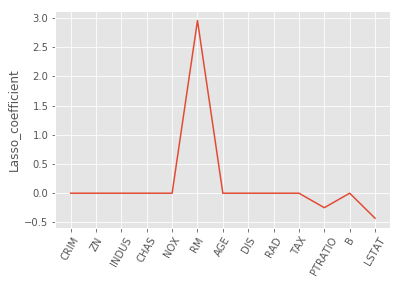

The most important feature/predictor on the datasets that infuence the y_target(price), is the RM 


In [72]:
### Dimenstration of the Lasso regression and important features using all features: 
## without split_train_test

#Using all features : 
X_features_reshaped = boston.data

#target_featues
y_target = boston.target.reshape(-1,1)

# names of the colomns 
names = bos.columns 

#choosing alpha
lasso = Lasso(alpha= 0.1, normalize= True)

# saving the lasso regularized coeff on important features
lasso_coeff = lasso.fit(X_features_reshaped, y_target).coef_

# plotting the lasso regularized  selected coeff of the loss function : 
_= plt.plot(range(len(names)), lasso_coeff)
_= plt.xticks(range(len(names)), names, rotation= 60)
_= plt.ylabel('Lasso_coefficient')
plt.show()

print("The most important feature/predictor on the datasets that infuence the y_target(price), is the RM ")

## Fine-tuning your model

(choosing K, KNN/ alpha in regularized regression ) 

Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. here, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning.


### Hyperparameters (to enhance model performance) : 


parameters that can be explecitly leanrned by the model and need to be specified before writing the model : 
- linear_regression (choosing the learning rate parameters)
- ridge/lasso (choosing alpha )
- Knn choosing K 

The approach is to choose and try randomly each time the parameter and take the one that gives a good model, we do this using a grid (grid search cross validation) and it's essential to use cross validation with the diffrent parameters to avoid overfitting the test. 

#### GridSearchCV
from sklean.model_selectiom import GridsearchCV
param_grid = {'n_neighbor' : np.arange(1,50}
Knn = Knei()
Knn_cv = GridSearchCV(Knn, param_grid, cv=5) 
knn_cv.fit(X,y)
Knn_cv.best_params_
Knn_cv.best_score_


#### RandomizedSearchCV (jumps arround the grid)

GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. 


###  How well the model well preform on unseen data : (Hold-out/ traning) set for final evaluation : 

We evaluate the model performan based on its performance on test set

The idea is to tune the model's hyperparameters on the training set, and then evaluate its performance on the hold-out set which it has never seen before.

After using K-fold cross-validation to tune model's hyperparameters, we can report how well the model can be expected to perform on a dataset that has never seen before(training Set/Hold out set)(predict y and compared to the actual y and compute the scoring function), given a scoring function on choice. 

thats why we need to perform grid search cross validation only on training set, and then choose the best hyperparameter and evaluate on hold-on set(testing set)


# Preprocessing and pipelines : 

steps to building a model:

Imputation > creating training and test sets > fitting a classifier or regressor > tuning its parameters > evaluating its performance on new data
 

from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow.

## Processing categorical variables into dummy variables (see gapminder region)

in sklearn : OneHotencoder()
in pandas : get_dummies()


## Handling missing data (see diabetes )

Step 1: replacing missing data with nan
df.column.replace(0, np.nan, inplace = True)

step 2 : imputing missing data
compute the mean of non-missing entries or using slkearn : 

###### without pipeline
from sklearn.preprocessing import Imputer 
imp = Imputer (missing_value = 'Nan', strategy = 'mean', axis =0)
imp.fit(predector_features)
predictore_features = imp.transform(predector features)

**then we split our data and pass it to the model** 


###### without pipeline

from sklearm.pipline import Pipeline 
from sklearn.preprocessing import Imputer
from sklearn.models import LogisticRegression 
from sklearn.model_selection import train_test_split


imp = Imputer (missing_value = 'Nan', strategy = 'mean', axis =0)

logreg = LogisticRegression()

steps_of_the_pipline = [('imputation', imp), ('logistic_regression', logreg)]

pipeline = Pipeline(steps_of_the_pipline)

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.4, random_state= 42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

pipeline.score(X_test, y_test) 


# Centering and scaling data (? regularization) : 

In such a situation where all of the features are binary scaling will have minimal impact.

Many models uses some form of distance to inform them (ex : Knn), features on larger scale can unduly infuence the model, for this reason we want the features to be on similar scale. To acheive this we do **Normalizing/Centering/Scaling** 

Ways to normalize the the data 

**1-Standarization** 
in a given column : substract the mean and devide by the variance (all features are centred around 0 and have a variance one) 

from sklearn.preprossecing import scale 
X_scaled = scale(X)

we can do this in a pipeline step using import StandardScaler 
we can also scale> hyperparameter tuning (using Gridsearcv(cv) > 

**2-** 
in a given column : substract the miminum and devide by the range (the normalized data has minimum 0 and max 1)

**3-** 
Normalize so that the data ranges from -1 to 1. 

# pipeline :  scaling and hyperparameter tuning to classify (See ex wine below)

In [143]:
## Feature scaling : 
wine = pd.read_csv('winequality-data.csv') # datasets.load_wine()
wine['target'] = wine['quality'].apply(lambda x: 5 if x < 5 else 0)
wine.head()

# wine_features and wine_target:
wine_featues = wine.drop(labels=['id','target'], axis= 1) # all features
wine_target = wine['target']

# Import scale
from sklearn.preprocessing import scale 

# Scale the features: X_scaled
wine_f_scaled = scale(wine_featues)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(wine_featues))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(wine_featues)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(wine_f_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(wine_f_scaled)))

Mean of Unscaled Features: fixed.acidity             6.854620
volatile.acidity          0.278027
citric.acid               0.333201
residual.sugar            6.405819
chlorides                 0.045566
free.sulfur.dioxide      35.326187
total.sulfur.dioxide    138.395227
density                   0.994026
pH                        3.187989
sulphates                 0.489704
alcohol                  10.518765
quality                   5.877489
dtype: float64
Standard Deviation of Unscaled Features: fixed.acidity            0.841771
volatile.acidity         0.100446
citric.acid              0.121359
residual.sugar           5.107320
chlorides                0.021135
free.sulfur.dioxide     17.155853
total.sulfur.dioxide    42.991332
density                  0.003024
pH                       0.150003
sulphates                0.114172
alcohol                  1.237037
quality                  0.890250
dtype: float64
Mean of Scaled Features: -1.1135100555301212e-15
Standard Deviation of Sca

In [151]:
# Centering and scaling in a pipeline with KNN without hyperparameter tuning

# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(wine_featues, wine_target, test_size = 0.3, random_state = 42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.9727891156462585
Accuracy without Scaling: 0.9583333333333334


In [155]:
# Pipeline scaling and hyperparameter tuning to classify for classification with SVM 

# build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.
#The hyperparameters you will tune are C and gamma. C controls the regularization strength. 
#It is analogous to the C you tuned for logistic regression
#while gamma controls the kernel coefficient:

# import Pipeline, svm, train_test_split, GridSearchCV, classification_report, accuracy_score 

from sklearn.svm import SVC


# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(wine_featues, wine_target, test_size = 0.2, random_state = 21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters, cv=3 )

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       746
          5       1.00      1.00      1.00        38

avg / total       1.00      1.00      1.00       784

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}
